# 1 实现线性回归模型




In [83]:
# install dependence
!pip install jupyter torch torchvision

In [84]:
# Import package
import torch
import matplotlib.pyplot as plt
import random

## 构造一个人造的数据集

### 定义线性模型参数

- Weight: $w=[2, -3.4]^T$
- Bias: $b=4.2$
- 噪声: $\epsilon$
- 标签: $y = Xw + b + \epsilon$

In [85]:
def create_data(w, b, size):
    # X: 均值为0, 方差为1, 大小为size*len(w)
    X = torch.normal(0, 1, (size, len(w)))
    y = torch.matmul(X, w) + b
    # 创造噪音epsilon
    epsilon = torch.normal(0, 0.01, y.shape)
    y += epsilon
    # reshape(x, y): 将张量变形，值为-1时表示自动.
    return X, y.reshape((-1, 1))

real_w, real_b = torch.tensor([2, -3.4]), 4.2
features, labels = create_data(w=real_w, b=real_b, size=1000)

features[0], labels[0]

(tensor([-0.1161,  1.7524]), tensor([-1.9851]))

### 将数据集打印出来

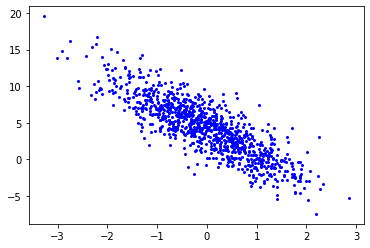

In [86]:
plt.plot(features[:, 1].detach().numpy(), labels.detach().numpy(), 'bo', markersize=2)

## 生成固定大小的 Batch

In [87]:
def data_iter(features, labels, batch_size):
    feat_size = len(features)
    # 生成一个大小为feat_size的下标列表并打乱
    indices = list(range(feat_size))
    random.shuffle(indices)

    for i in range(0, feat_size, batch_size):
        # end有可能超过features的总数, 因此取min
        idx = indices[i:min(i+batch_size, feat_size)]
        batch_indices = torch.tensor(idx)
        yield features[batch_indices], labels[batch_indices]


for X, y in data_iter(features, labels, batch_size=10):
    print(X, '\n', y)
    break

tensor([[-2.1608,  1.0692],
        [-2.4839, -0.4341],
        [-0.1433,  0.5478],
        [ 0.1625,  1.7261],
        [-1.2201,  0.4336],
        [-0.9079, -0.1140],
        [ 0.6082,  0.3338],
        [ 0.5135, -0.3668],
        [-0.9964, -0.7647],
        [ 0.5349,  0.3874]]) 
 tensor([[-3.7537],
        [ 0.7143],
        [ 2.0761],
        [-1.3540],
        [ 0.2899],
        [ 2.7665],
        [ 4.2907],
        [ 6.4765],
        [ 4.8054],
        [ 3.9603]])


## 定义初始化模型参数

In [88]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w, b

(tensor([[-0.0158],
         [-0.0147]], requires_grad=True), tensor([0.], requires_grad=True))

## 定义模型

In [89]:
def linreg(X, w, b):
    # y = Xw + b
    return torch.matmul(X, w) + b

## 定义损失函数

使用均方误差:
$$
L = \frac{1}{2}(\hat{y} - y)^2
$$

In [90]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

## 定义优化算法

In [91]:
def sgd(params, learning_rate, batch_size):
    with torch.no_grad():
        for param in params:
            param -= learning_rate * param.grad / batch_size
            param.grad.zero_()

## 开始训练

定义参数

In [92]:
learning_rate = 0.03
epoch_times = 3
net = linreg
loss = squared_loss

In [93]:
for epoch in range(epoch_times):
    for X, y in data_iter(features, labels, batch_size=10):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd(params=[w, b], learning_rate=learning_rate, batch_size=10)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print("epoch:", epoch+1, ", loss:", float(train_l.mean()))

epoch: 1 , loss: 0.03422924131155014
epoch: 2 , loss: 0.00012319434608798474
epoch: 3 , loss: 4.7158908273559064e-05


## 比较训练w, b与真实real_w, real_b

In [94]:
diff_w = real_w - w
diff_b = real_b - b

diff_w, diff_b

(tensor([[ 6.1035e-04, -5.3994e+00],
         [ 5.3998e+00, -1.8024e-04]], grad_fn=<SubBackward0>),
 tensor([0.0012], grad_fn=<RsubBackward1>))